# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from src.supervised_learning.dataset import Ta41Dataset
from torch.utils.data import random_split

/Users/cschmidl/phd/repos/stable-job-shop/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [34]:
dataset = Ta41Dataset.get_randomly_permuted_dataset()
print(f"Length of initial dataset: {len(dataset)}")
print(dataset[0][1]) # [experience index][0 = experiences, 1 = action], type tensor

Length of initial dataset: 609000
tensor([14])


# Inspect Distribution

In [35]:
X = dataset[:][0]
y = dataset[:][1]
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

y_values, y_counts = np.unique(y, return_counts=True)
print(y_values)
print(y_counts)

Shape of X: torch.Size([609000, 30, 7])
Shape of y: torch.Size([609000, 1])
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[20000 20000 20000 20000 20000 20000 20000 20000 20000 20000 20000 20000
 20000 20000 20000 20000 20000 20000 20000 20000 20000 20000 20000 20000
 20000 20000 20000 20000 20000 20000  9000]


In [36]:
y_df = pd.DataFrame(y.numpy())
y_df.columns = ['action']

<AxesSubplot: >

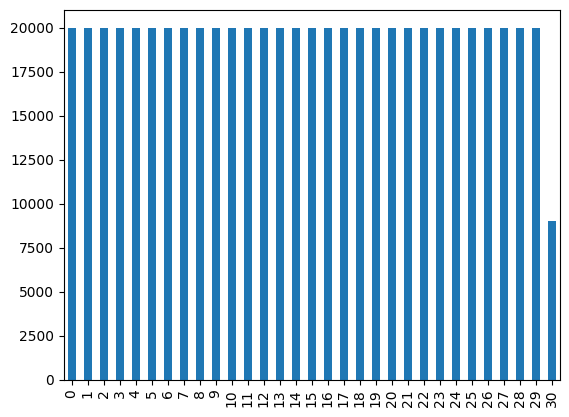

In [37]:
y_df["action"].value_counts().sort_index().plot(kind="bar")

# Random splits

In [41]:
train, test, valid = random_split(dataset, [0.8, 0.1, 0.1])
len_dataset = len(dataset)
len_train = len(train)
len_test = len(test)
len_valid = len(valid)
len_sum_of_splits = len_train + len_test + len_valid

print(f"Length of full dataset: {len_dataset}")
print(f"Length of train: {len_train}")
print(f"Length of test: {len_test}")
print(f"Length of valid: {len_valid}")
print(f"Summed lengths of splits: {len_sum_of_splits}")

Length of full dataset: 609000
Length of train: 487200
Length of test: 60900
Length of valid: 60900
Summed lengths of splits: 609000


## Train split

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[16050 15984 16042 15956 15964 15971 15956 16088 15969 15996 16006 15961
 16094 15983 16041 15948 16112 15934 15970 15908 16025 15908 15972 15999
 16106 16054 15990 16082 15957 15961  7213]


<AxesSubplot: >

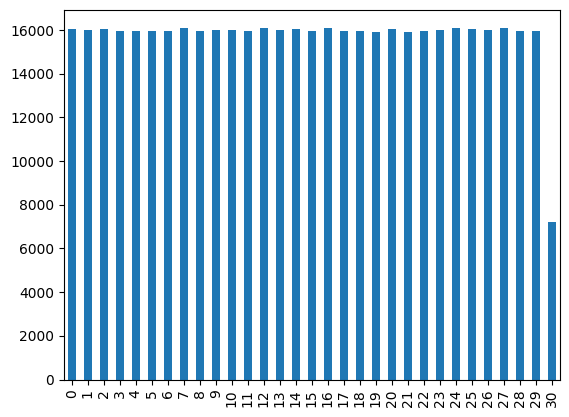

In [47]:
y_train_values, y_train_counts = np.unique(train[:][1], return_counts=True)
print(y_train_values)
print(y_train_counts)

y_train_df = pd.DataFrame(train[:][1].numpy())
y_train_df.columns = ['action']
y_train_df["action"].value_counts().sort_index().plot(kind="bar")

## Test split

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[2012 1996 2014 2038 1936 1998 1971 1964 2028 2034 2033 1992 1999 2070
 1961 2002 1946 2024 1992 2029 1995 2038 1961 2043 1900 2030 2025 1953
 1953 2069  894]


<AxesSubplot: >

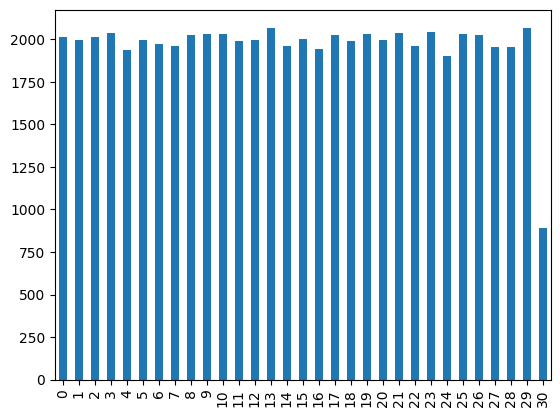

In [48]:
y_test_values, y_test_counts = np.unique(test[:][1], return_counts=True)
print(y_test_values)
print(y_test_counts)

y_test_df = pd.DataFrame(test[:][1].numpy())
y_test_df.columns = ['action']
y_test_df["action"].value_counts().sort_index().plot(kind="bar")

## Validation split

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[1938 2020 1944 2006 2100 2031 2073 1948 2003 1970 1961 2047 1907 1947
 1998 2050 1942 2042 2038 2063 1980 2054 2067 1958 1994 1916 1985 1965
 2090 1970  893]


<AxesSubplot: >

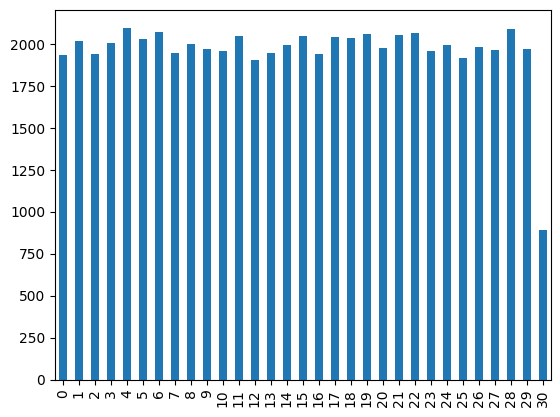

In [49]:
y_valid_values, y_valid_counts = np.unique(valid[:][1], return_counts=True)
print(y_valid_values)
print(y_valid_counts)

y_valid_df = pd.DataFrame(valid[:][1].numpy())
y_valid_df.columns = ['action']
y_valid_df["action"].value_counts().sort_index().plot(kind="bar")